In [17]:
import pandas as pd
import os
import numpy as np

#getting data
sales_prediction_df=pd.read_csv('/content/drive/MyDrive/MLResearch/Sales Prediction Dataset/advertising_sales_data.xlsx.csv')
print(sales_prediction_df.head())

#data preprocessing
tv_adv=sales_prediction_df['TV']
radio_adv=sales_prediction_df['Radio']
newspaper_adv=sales_prediction_df['Newspaper']
sales=sales_prediction_df['Sales']

  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9


Data Visulaiztion and Analysis

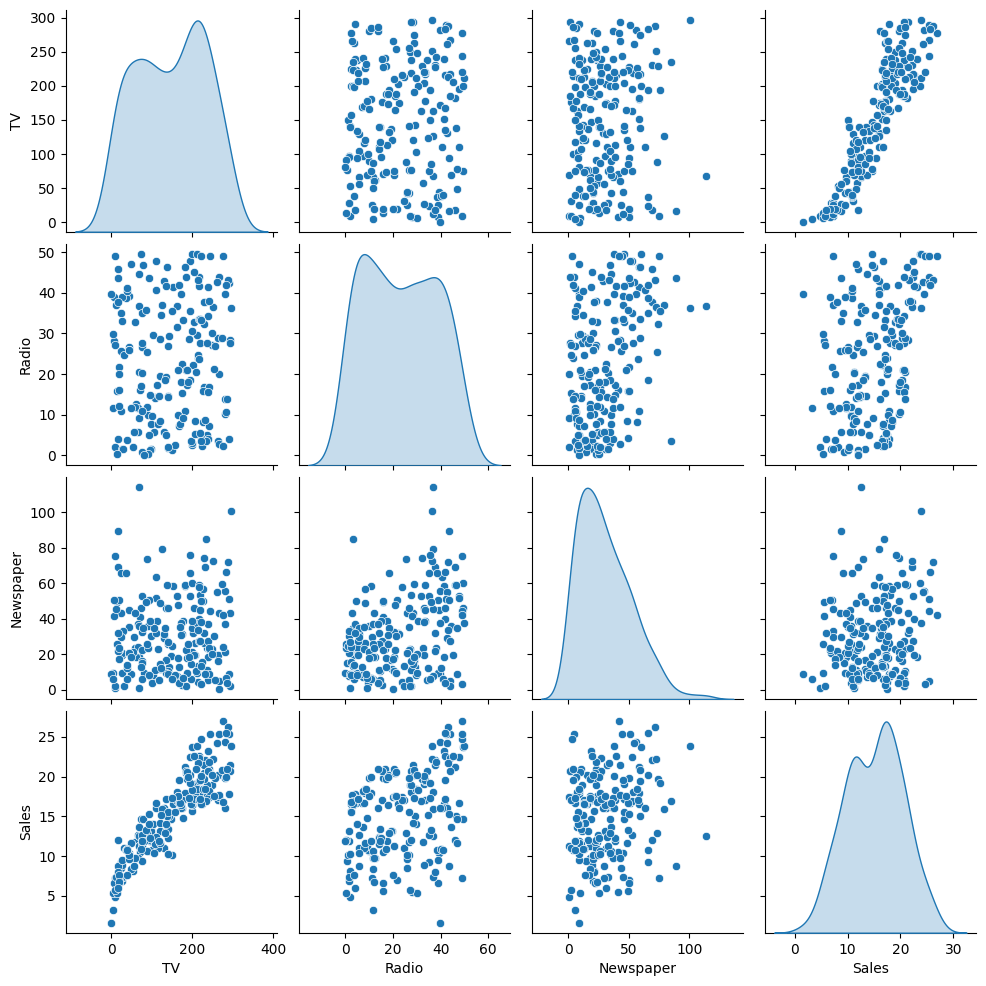

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

#data visualization
sns.pairplot(data=sales_prediction_df, diag_kind='kde')
plt.show()

#calculating correlation between features and sales
correlation_tv=tv_adv.corr(sales)
correlation_radio=radio_adv.corr(sales)
correlation_newspaper=newspaper_adv.corr(sales)


In [19]:
#handling missing datapoints
imputer = SimpleImputer(strategy='mean')
sales_prediction_df['TV'] = imputer.fit_transform(sales_prediction_df['TV'].values.reshape(-1, 1))
sales_prediction_df['Radio'] = imputer.fit_transform(sales_prediction_df['Radio'].values.reshape(-1, 1))
sales_prediction_df['Newspaper'] = imputer.fit_transform(sales_prediction_df['Newspaper'].values.reshape(-1, 1))

print(f"\nCorrelation between TV and Sales: {correlation_tv}")
print(f"\nCorrelation between Radio and Sales: {correlation_radio}")
print(f"\nCorrelation between Newspaper and Sales: {correlation_newspaper}")

highest_correlation=max(correlation_tv,correlation_radio,correlation_newspaper)
if highest_correlation==correlation_tv:
  print("\nTV has the highest impact with Sales")
elif highest_correlation==correlation_radio:
  print("\nRadio has the highest impact with Sales")
else:
  print("\nNewspaper has the highest impact with Sales")



Correlation between TV and Sales: 0.9012079133023306

Correlation between Radio and Sales: 0.3497277129207837

Correlation between Newspaper and Sales: 0.15796002615492621

TV has the highest impact with Sales


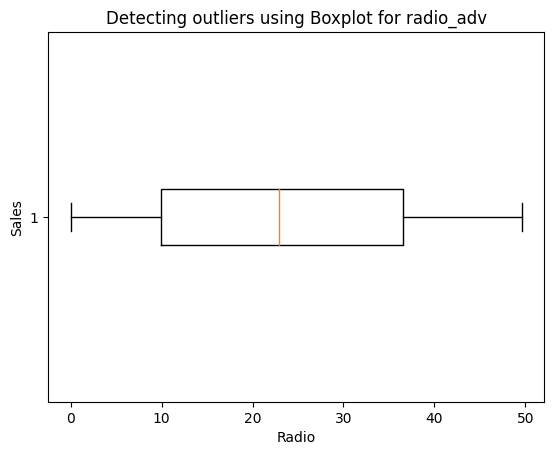

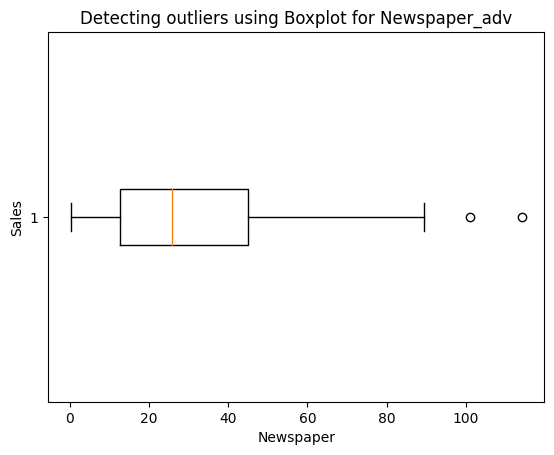

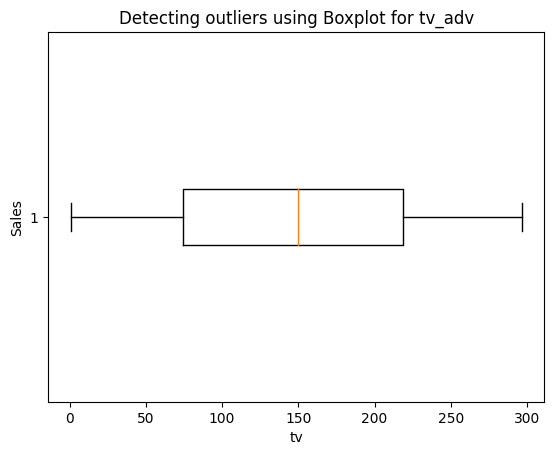

In [20]:
#checking for outliers
plt.boxplot(sales_prediction_df['Radio'], vert=False)
plt.title("Detecting outliers using Boxplot for radio_adv")
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

plt.boxplot(newspaper_adv, vert=False)
plt.title("Detecting outliers using Boxplot for Newspaper_adv")
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

plt.boxplot(tv_adv, vert=False)
plt.title("Detecting outliers using Boxplot for tv_adv")
plt.xlabel('tv')
plt.ylabel('Sales')
plt.show()

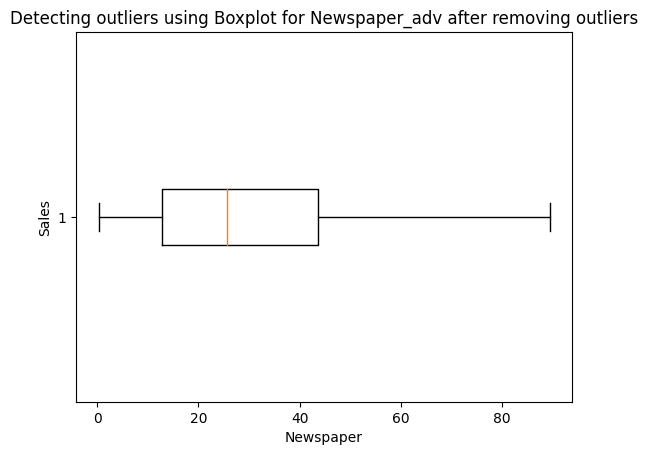

In [21]:
#replacing outliers with median
# Identify outliers using the IQR method
Q1 = sales_prediction_df['Newspaper'].quantile(0.25)
Q3 = sales_prediction_df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the median value of the Newspaper column
median_newspaper = sales_prediction_df['Newspaper'].median()

# Replace outliers with the median
sales_prediction_df['Newspaper'] = np.where((sales_prediction_df['Newspaper'] < lower_bound) | (sales_prediction_df['Newspaper'] > upper_bound),
                             median_newspaper,
                             sales_prediction_df['Newspaper'])

#visulaizing again
plt.boxplot(sales_prediction_df['Newspaper'], vert=False)
plt.title("Detecting outliers using Boxplot for Newspaper_adv after removing outliers")
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

In [22]:
#calculating average of tv_sales
tv_average=tv_adv.mean()
print(f"\nThe averge amount spent on tv sales= {tv_average}")


The averge amount spent on tv sales= 147.0425


Without Normalization
Mean Squared Error: 2.9393812036253637
R-squared: 0.904877780932544


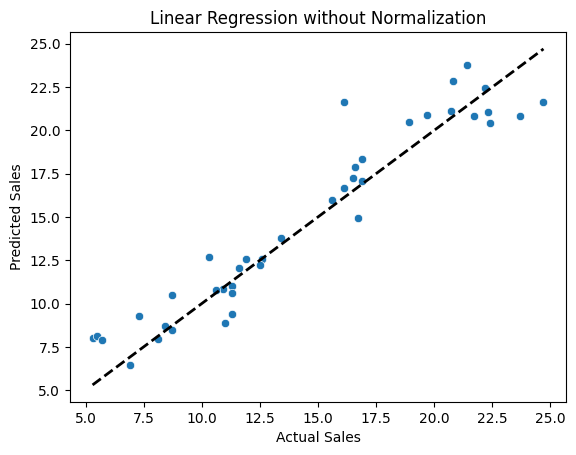

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = sales_prediction_df[['TV', 'Radio', 'Newspaper']]
y = sales_prediction_df['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Without Normalization")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression without Normalization')
plt.show()


linear regression model when the dataset is normalized

With Normalization
Mean Squared Error: 2.9393812036253633
R-squared: 0.904877780932544


Text(0.5, 1.0, 'Linear Regression with Normalization')

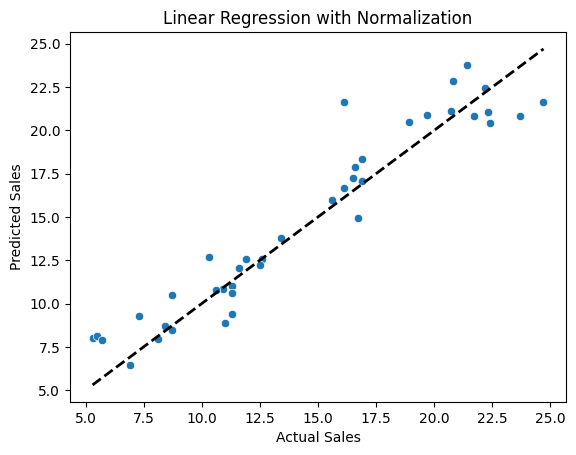

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline that standardizes the data then trains the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_normalized = pipeline.predict(X_test)

# Evaluate the model
mse_normalized = mean_squared_error(y_test, y_pred_normalized)
r2_normalized = r2_score(y_test, y_pred_normalized)

print("With Normalization")
print("Mean Squared Error:", mse_normalized)
print("R-squared:", r2_normalized)

sns.scatterplot(x=y_test, y=y_pred_normalized)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression with Normalization')


sales prediction when only radio and newspaper advertising expenditures are used as predictors


Using only Radio and Newspaper
Mean Squared Error: 27.882464782605098
R-squared: 0.09768698257974306


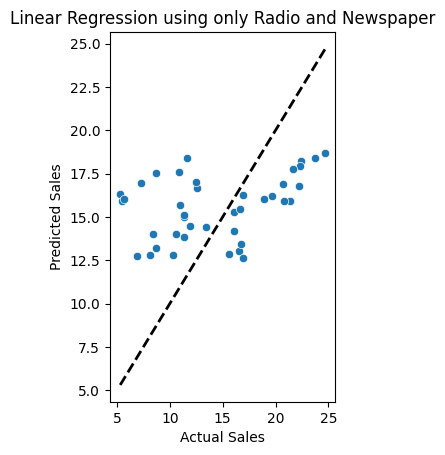

In [25]:
X_radio_newspaper = sales_prediction_df[['Radio', 'Newspaper']]

#splitting
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_radio_newspaper, y, test_size=0.2, random_state=42)

#training
model_rn = LinearRegression()
model_rn.fit(X_train_rn, y_train_rn)
y_pred_rn = model_rn.predict(X_test_rn)

#evaluation
mse_rn = mean_squared_error(y_test_rn, y_pred_rn)
r2_rn = r2_score(y_test_rn, y_pred_rn)

print("\nUsing only Radio and Newspaper")
print("Mean Squared Error:", mse_rn)
print("R-squared:", r2_rn)

#visualization
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_rn, y=y_pred_rn)
plt.plot([y_test_rn.min(), y_test_rn.max()], [y_test_rn.min(), y_test_rn.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression using only Radio and Newspaper')
plt.show()